# Model Comparison Lab

In this lab we will compare the performance of all the models we have learned about so far, using the car evaluation dataset.


## 1. Prepare the data

The [car evaluation dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/car/) is in the assets/datasets folder. By now you should be very familiar with this dataset.

1. Load the data into a pandas dataframe
- Encode the categorical features properly: define a map that preserves the scale (assigning smaller numbers to words indicating smaller quantities)
- Separate features from target into X and y

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('assets/datasets/car.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
print df.buying.unique()
print df.maint.unique()
print df.lug_boot.unique()
print df.safety.unique()
print df.acceptability.unique()
print df.persons.unique()
print df.doors.unique()

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']
['2' '4' 'more']
['2' '3' '4' '5more']


In [5]:
map1 = {'low':1,
        'med':2,
        'high':3,
        'vhigh':4}
map2 = {'small':1,
        'med':2,
        'big':3}
map3 = {'unacc':1,
        'acc':2,
        'good':3,
        'vgood':4}
map4 = {'2': 2,
        '4': 4,
        'more': 5}
map5 = {'2': 2,
        '3': 3,
        '4': 4,
        '5more': 5}

In [6]:
features = [c for c in df.columns if c != 'acceptability']
dfn = df.copy()

dfn.buying= df.buying.map(map1)
dfn.maint= df.maint.map(map1)
dfn.lug_boot = df.lug_boot.map(map2)
dfn.persons = df.persons.map(map4)
dfn.doors = df.doors.map(map5)
dfn.safety = df.safety.map(map1)
dfn.acceptability = df.acceptability.map(map3)

X = dfn[features]
y = dfn['acceptability']
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2


In [7]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying           1728 non-null int64
maint            1728 non-null int64
doors            1728 non-null int64
persons          1728 non-null int64
lug_boot         1728 non-null int64
safety           1728 non-null int64
acceptability    1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


## 2. Useful preparation

Since we will compare several models, let's write a couple of helper functions.

1. Separate X and y between a train and test set, using 30% test set, random state = 42
    - make sure that the data is shuffled and stratified
2. Define a function called `evaluate_model`, that trains the model on the train set, tests it on the test, calculates the evaluative measures below.
  - accuracy score
  - confusion matrix
  - classification report
3. Initialize a global dictionary to store the various models for later retrieval

In [8]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print cm
    print cr
    
    return a

all_models = {}

## 3.a KNN

Let's start with `KNeighborsClassifier`.

1. Initialize a KNN model
- Evaluate its performance with the function you previously defined
- Find the optimal value of parameter K using grid search
    - Be careful on how you perform the cross validation in the grid search

In [9]:
from sklearn.neighbors import KNeighborsClassifier

a = evaluate_model(KNeighborsClassifier())

[[354   9   0   0]
 [  8 107   0   0]
 [  0   9  11   1]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.98      0.98      0.98       363
          2       0.84      0.93      0.88       115
          3       1.00      0.52      0.69        21
          4       0.95      0.90      0.92        20

avg / total       0.95      0.94      0.94       519



In [10]:
from sklearn.grid_search import GridSearchCV

params = {'n_neighbors': range(2,60)}

gsknn = GridSearchCV(KNeighborsClassifier(),
                     params, n_jobs=-1,
                     cv=KFold(len(y), n_folds=3, shuffle=True))

In [11]:
gsknn.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=1728, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [12]:
gsknn.best_params_

{'n_neighbors': 5}

In [13]:
gsknn.best_score_

0.9467592592592593

In [14]:
evaluate_model(gsknn.best_estimator_)

[[354   9   0   0]
 [  8 107   0   0]
 [  0   9  11   1]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.98      0.98      0.98       363
          2       0.84      0.93      0.88       115
          3       1.00      0.52      0.69        21
          4       0.95      0.90      0.92        20

avg / total       0.95      0.94      0.94       519



0.94412331406551064

In [15]:
all_models['knn'] = {'model': gsknn.best_estimator_,
                     'score': a}

## 3.b Bagging + KNN

Now that we have found the optimal K, let's wrap `KNeighborsClassifier` in a BaggingClassifier and see if the score improves.

1. Wrap the KNN model in a Bagging Classifier
- Evaluate performance
- Do a grid search only on the bagging classifier parameters

In [16]:
from sklearn.ensemble import BaggingClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier())


In [17]:
evaluate_model(baggingknn)

[[358   5   0   0]
 [  6 109   0   0]
 [  0   6  13   2]
 [  0   4   0  16]]
             precision    recall  f1-score   support

          1       0.98      0.99      0.98       363
          2       0.88      0.95      0.91       115
          3       1.00      0.62      0.76        21
          4       0.89      0.80      0.84        20

avg / total       0.96      0.96      0.95       519



0.95568400770712914

In [18]:
bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}


gsbaggingknn = GridSearchCV(baggingknn,
                            bagging_params, n_jobs=-1,
                            cv=KFold(len(y), n_folds=3, shuffle=True))

In [19]:
gsbaggingknn.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=1728, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20], 'max_samples': [0.7, 1.0], 'bootstrap_features': [True, False], 'max_features': [0.7, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [20]:
gsbaggingknn.best_params_

{'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.7,
 'n_estimators': 20}

In [21]:
all_models['gsbaggingknn'] = {'model': gsbaggingknn.best_estimator_,
                              'score': evaluate_model(gsbaggingknn.best_estimator_)}

[[359   4   0   0]
 [  6 109   0   0]
 [  0   6  14   1]
 [  0   4   0  16]]
             precision    recall  f1-score   support

          1       0.98      0.99      0.99       363
          2       0.89      0.95      0.92       115
          3       1.00      0.67      0.80        21
          4       0.94      0.80      0.86        20

avg / total       0.96      0.96      0.96       519



## 4. Logistic Regression

Let's see if logistic regression performs better.

1. Initialize LR and test on Train/Test set
- Find optimal parameters with Grid Search
- See if Bagging improves the score

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
all_models['lr'] = {'model': lr,
                    'score': evaluate_model(lr)}

[[347  11   4   1]
 [ 59  53   3   0]
 [  5  15   1   0]
 [  0  19   0   1]]
             precision    recall  f1-score   support

          1       0.84      0.96      0.90       363
          2       0.54      0.46      0.50       115
          3       0.12      0.05      0.07        21
          4       0.50      0.05      0.09        20

avg / total       0.73      0.77      0.74       519



In [23]:
params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
          'penalty': ['l1', 'l2']}

gslr = GridSearchCV(lr,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gslr.fit(X, y)

print gslr.best_params_
print gslr.best_score_

all_models['gslr'] = {'model': gslr.best_estimator_,
                             'score': evaluate_model(gslr.best_estimator_)}

{'penalty': 'l1', 'C': 10.0}
0.827546296296
[[344  14   4   1]
 [ 48  64   3   0]
 [  4  14   2   1]
 [  0   9   0  11]]
             precision    recall  f1-score   support

          1       0.87      0.95      0.91       363
          2       0.63      0.56      0.59       115
          3       0.22      0.10      0.13        21
          4       0.85      0.55      0.67        20

avg / total       0.79      0.81      0.80       519



In [24]:
gsbagginglr = GridSearchCV(BaggingClassifier(gslr.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbagginglr.fit(X, y)

print gsbagginglr.best_params_
print gsbagginglr.best_score_

all_models['gsbagginglr'] = {'model': gsbagginglr.best_estimator_,
                             'score': evaluate_model(gsbagginglr.best_estimator_)}

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'bootstrap_features': False}
0.828703703704
[[345  14   3   1]
 [ 50  63   2   0]
 [  3  16   1   1]
 [  0   8   0  12]]
             precision    recall  f1-score   support

          1       0.87      0.95      0.91       363
          2       0.62      0.55      0.58       115
          3       0.17      0.05      0.07        21
          4       0.86      0.60      0.71        20

avg / total       0.78      0.81      0.79       519



## 5. Decision Trees

Let's see if Decision Trees perform better.

1. Initialize DT and test on Train/Test set
- Find optimal parameters with Grid Search
- See if Bagging improves the score

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
all_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}

[[361   2   0   0]
 [  9 105   1   0]
 [  1   2  18   0]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.97      0.99      0.98       363
          2       0.95      0.91      0.93       115
          3       0.95      0.86      0.90        21
          4       1.00      0.95      0.97        20

avg / total       0.97      0.97      0.97       519



In [26]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}

gsdt = GridSearchCV(dt,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsdt.fit(X, y)
print gsdt.best_params_
print gsdt.best_score_

all_models['gsdt'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model(gsdt.best_estimator_)}

{'min_samples_split': 2, 'splitter': 'best', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}
0.984375
[[361   2   0   0]
 [ 14 100   1   0]
 [  1   5  15   0]
 [  0   0   0  20]]
             precision    recall  f1-score   support

          1       0.96      0.99      0.98       363
          2       0.93      0.87      0.90       115
          3       0.94      0.71      0.81        21
          4       1.00      1.00      1.00        20

avg / total       0.96      0.96      0.95       519



In [27]:
gsbaggingdt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingdt.fit(X, y)

print gsbaggingdt.best_params_
print gsbaggingdt.best_score_

all_models['gsbaggingdt'] = {'model': gsbaggingdt.best_estimator_,
                             'score': evaluate_model(gsbaggingdt.best_estimator_)}

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20, 'bootstrap_features': False}
0.975115740741
[[359   3   1   0]
 [  4 110   0   1]
 [  0   4  16   1]
 [  0   0   0  20]]
             precision    recall  f1-score   support

          1       0.99      0.99      0.99       363
          2       0.94      0.96      0.95       115
          3       0.94      0.76      0.84        21
          4       0.91      1.00      0.95        20

avg / total       0.97      0.97      0.97       519



## 6. Support Vector Machines

Let's see if SVM performs better.

1. Initialize SVM and test on Train/Test set
- Find optimal parameters with Grid Search
- See if Bagging improves the score

In [28]:
from sklearn.svm import SVC

svm = SVC()
all_models['svm'] = {'model': svm,
                     'score': evaluate_model(svm)}

[[352  11   0   0]
 [  4 110   1   0]
 [  0   5  14   2]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.99      0.97      0.98       363
          2       0.87      0.96      0.91       115
          3       0.93      0.67      0.78        21
          4       0.90      0.95      0.93        20

avg / total       0.96      0.95      0.95       519



In [29]:
params = {'C': [0.01, 0.1, 1.0, 10.0, 30.0, 100.0],
          'gamma': ['auto', 0.1, 1.0, 10.0],
          'kernel': ['linear', 'rbf']}


gssvm = GridSearchCV(svm,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gssvm.fit(X, y)
print gssvm.best_params_
print gssvm.best_score_

all_models['gssvm'] = {'model': gssvm.best_estimator_,
                      'score': evaluate_model(gssvm.best_estimator_)}

{'kernel': 'rbf', 'C': 100.0, 'gamma': 'auto'}
0.984953703704
[[363   0   0   0]
 [  4 111   0   0]
 [  0   2  19   0]
 [  0   0   0  20]]
             precision    recall  f1-score   support

          1       0.99      1.00      0.99       363
          2       0.98      0.97      0.97       115
          3       1.00      0.90      0.95        21
          4       1.00      1.00      1.00        20

avg / total       0.99      0.99      0.99       519



In [30]:
gsbaggingsvm = GridSearchCV(BaggingClassifier(gssvm.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingsvm.fit(X, y)

print gsbaggingsvm.best_params_
print gsbaggingsvm.best_score_

all_models['gsbaggingsvm'] = {'model': gsbaggingsvm.best_estimator_,
                             'score': evaluate_model(gsbaggingsvm.best_estimator_)}

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'bootstrap_features': False}
0.980324074074
[[363   0   0   0]
 [  4 111   0   0]
 [  0   2  17   2]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.99      1.00      0.99       363
          2       0.97      0.97      0.97       115
          3       1.00      0.81      0.89        21
          4       0.90      0.95      0.93        20

avg / total       0.98      0.98      0.98       519



## 7. Random Forest & Extra Trees

Let's see if Random Forest and Extra Trees perform better.

1. Initialize RF and ET and test on Train/Test set
- Find optimal parameters with Grid Search


In [31]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier()
all_models['rf'] = {'model': rf,
                    'score': evaluate_model(rf)}



et = ExtraTreesClassifier()
all_models['et'] = {'model': et,
                    'score': evaluate_model(et)}


[[359   4   0   0]
 [  4 110   0   1]
 [  0   5  14   2]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.99      0.99      0.99       363
          2       0.91      0.96      0.93       115
          3       1.00      0.67      0.80        21
          4       0.86      0.90      0.88        20

avg / total       0.97      0.97      0.96       519

[[359   3   1   0]
 [ 11 103   0   1]
 [  1   3  15   2]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.97      0.99      0.98       363
          2       0.94      0.90      0.92       115
          3       0.94      0.71      0.81        21
          4       0.86      0.95      0.90        20

avg / total       0.96      0.96      0.95       519



In [32]:
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsrf.fit(X, y)
print gsrf.best_params_
print gsrf.best_score_

all_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 50, 'criterion': 'entropy', 'max_depth': None, 'class_weight': None}
0.976273148148
[[359   4   0   0]
 [  4 110   0   1]
 [  0   2  17   2]
 [  0   2   0  18]]
             precision    recall  f1-score   support

          1       0.99      0.99      0.99       363
          2       0.93      0.96      0.94       115
          3       1.00      0.81      0.89        21
          4       0.86      0.90      0.88        20

avg / total       0.97      0.97      0.97       519



In [33]:
gset = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gset.fit(X, y)
print gset.best_params_
print gset.best_score_

all_models['gset'] = {'model': gset.best_estimator_,
                      'score': evaluate_model(gset.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 50, 'criterion': 'entropy', 'max_depth': None, 'class_weight': None}
0.97337962963
[[359   3   1   0]
 [  5 109   0   1]
 [  0   5  15   1]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.99      0.99      0.99       363
          2       0.92      0.95      0.94       115
          3       0.94      0.71      0.81        21
          4       0.90      0.95      0.93        20

avg / total       0.97      0.97      0.97       519



## 8. Model comparison

Let's compare the scores of the various models.

1. Do a bar chart of the scores of the best models. Who's the winner on the train/test split?
- Re-test all the models using a 3 fold stratified shuffled cross validation
- Do a bar chart with errorbars of the cross validation average scores. is the winner the same?


,score
model,
gssvm,0.988439
gsbaggingsvm,0.982659
gsbaggingdt,0.973025
gsrf,0.971098
dt,0.969171
gset,0.967245
rf,0.965318
gsbaggingknn,0.959538
et,0.955684


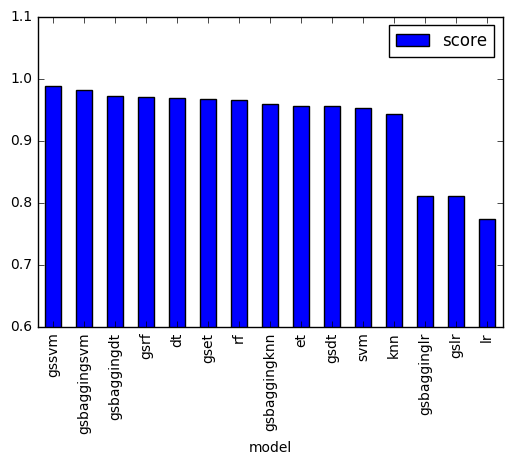

In [34]:
scores = pd.DataFrame([(k, v['score']) for k, v in all_models.iteritems()],
             columns=['model', 'score']).set_index('model').sort_values('score', ascending=False)


scores.plot(kind='bar')
plt.ylim(0.6, 1.1)

scores

In [35]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold

def retest(model):
    scores = cross_val_score(model, X, y,
                             cv=StratifiedKFold(y, shuffle=True),
                             n_jobs=-1)
    m = scores.mean()
    s = scores.std()
    
    return m, s

for k, v in all_models.iteritems():
    cvres = retest(v['model'])
    print k, 
    all_models[k]['cvres'] = cvres
    

knn gsbagginglr gsrf svm et gsbaggingsvm gslr rf gsbaggingdt gsdt lr gset gssvm gsbaggingknn dt


,score,error
model,,
gssvm,0.988421,0.004110
gsbaggingsvm,0.980902,0.003754
gset,0.978599,0.009405
gsrf,0.975119,0.003543
gsbaggingdt,0.973957,0.006182
gsdt,0.972223,0.001399
dt,0.969312,0.014363
rf,0.962959,0.005013
et,0.955434,0.005422


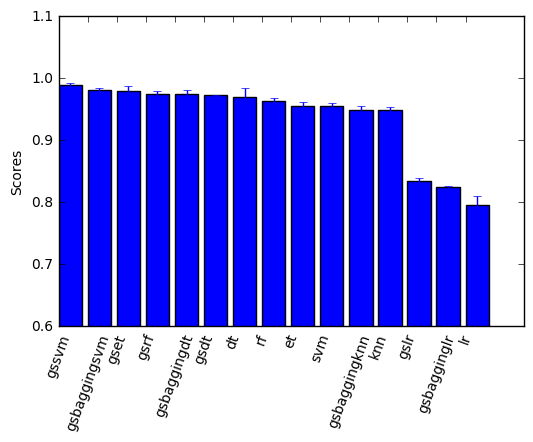

In [36]:
cvscores = pd.DataFrame([(k, v['cvres'][0], v['cvres'][1] ) for k, v in all_models.iteritems()],
                        columns=['model', 'score', 'error']).set_index('model').sort_values('score', ascending=False)



fig, ax = plt.subplots()
rects1 = ax.bar(range(len(cvscores)), cvscores.score,
                yerr=cvscores.error,
                tick_label=cvscores.index)

ax.set_ylabel('Scores')
plt.xticks(rotation=70)
plt.ylim(0.6, 1.1)

cvscores

## Bonus

We have encoded the data using a map that preserves the scale.
Would our results have changed if we had encoded the categorical data using `pd.get_dummies` or `OneHotEncoder`  to encode them as binary variables instead?

1. Repeat the analysis for this scenario. Is it better?
- Experiment with other models or other parameters, can you beat your classmates' best score?

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

onehotpipe = make_pipeline(OneHotEncoder(),
                           dt)


all_models['onehotpipe'] = {'model': onehotpipe,
                            'score': evaluate_model(onehotpipe)}

[[358   4   1   0]
 [ 18  96   1   0]
 [  0   1  18   2]
 [  0   1   0  19]]
             precision    recall  f1-score   support

          1       0.95      0.99      0.97       363
          2       0.94      0.83      0.88       115
          3       0.90      0.86      0.88        21
          4       0.90      0.95      0.93        20

avg / total       0.95      0.95      0.94       519

